In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/Data/BTC.csv', index_col=0, parse_dates=True)
df.drop(columns=['Volume'], inplace=True)
df['Risk Free Rate'] = ()

ValueError: Length of values (0) does not match length of index (3562)

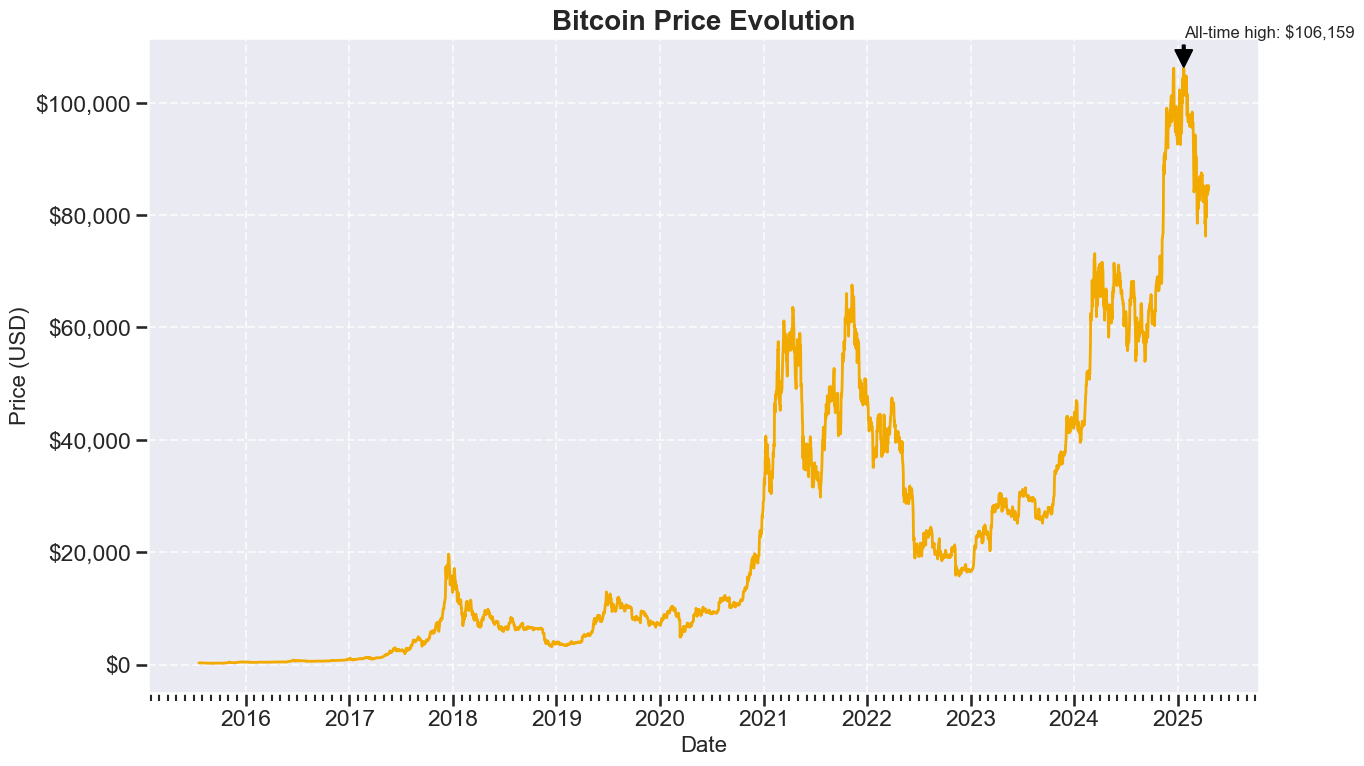

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Set the style for a professional presentation
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("talk")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the BTC close price
ax.plot(df.index, df['Close'], linewidth=2, color='#f2a900')  # Bitcoin gold color

# Format the x-axis to show dates nicely
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add labels and title
ax.set_title('Bitcoin Price Evolution', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Price (USD)', fontsize=16)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Format y-axis with commas for thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Annotate the all-time high
max_price_idx = df['Close'].idxmax()
max_price = df.loc[max_price_idx, 'Close']
ax.annotate(f'All-time high: ${max_price:,.0f}',
            xy=(max_price_idx, max_price),
            xytext=(max_price_idx, max_price*1.05),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


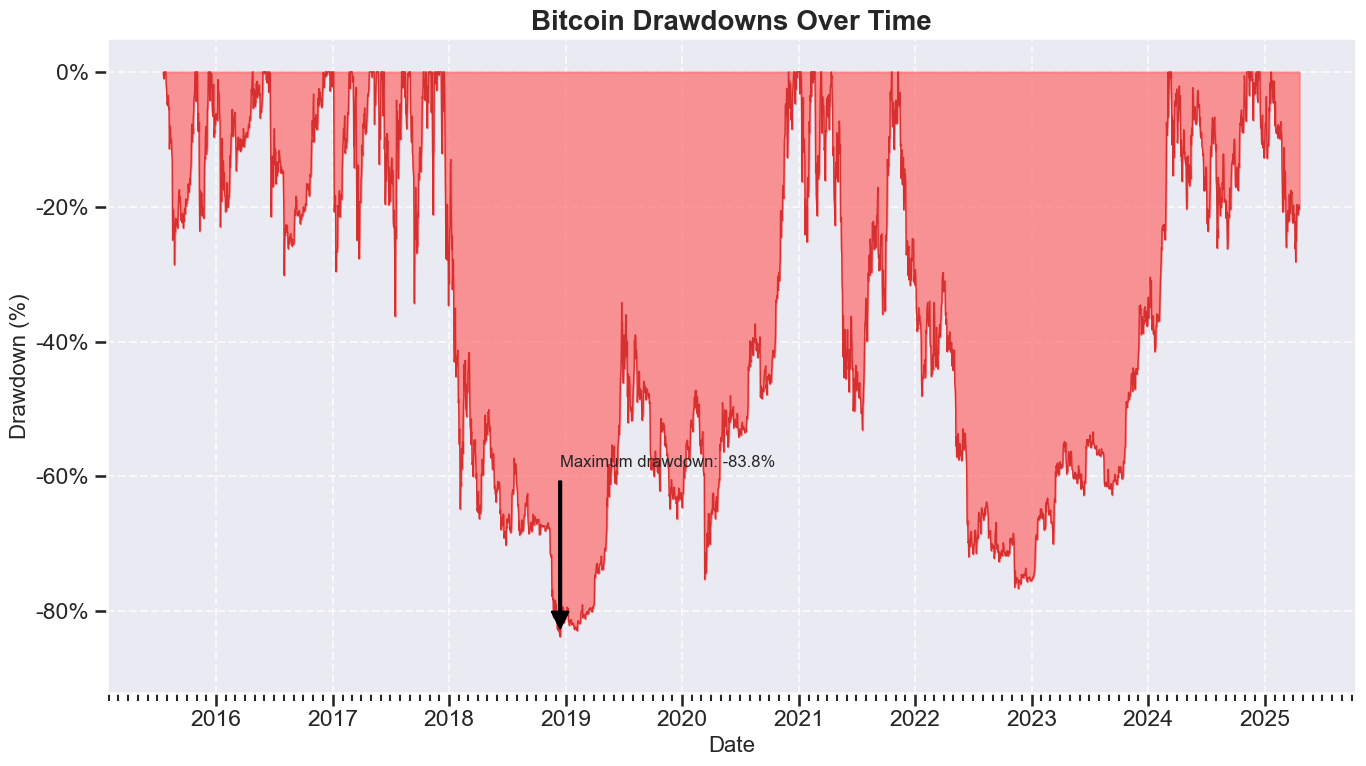

In [4]:
# Calculate drawdowns
# Drawdown is the percentage decline from a peak to a subsequent trough
# First, calculate the running maximum
running_max = df['Close'].cummax()
# Calculate drawdown as a percentage
drawdown = (df['Close'] - running_max) / running_max * 100

# Create a new figure for drawdowns
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the drawdowns
ax.fill_between(df.index, drawdown, 0, color='#ff6b6b', alpha=0.7)
ax.plot(df.index, drawdown, color='#d63031', linewidth=1)

# Format the x-axis to show dates nicely
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add labels and title
ax.set_title('Bitcoin Drawdowns Over Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Drawdown (%)', fontsize=16)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:.0f}%"))

# Find and annotate the maximum drawdown
max_drawdown_idx = drawdown.idxmin()
max_drawdown = drawdown.loc[max_drawdown_idx]
ax.annotate(f'Maximum drawdown: {max_drawdown:.1f}%',
            xy=(max_drawdown_idx, max_drawdown),
            xytext=(max_drawdown_idx, max_drawdown*0.7),  # Position text above the point
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12)

# Set y-axis limits to make the drawdowns more visible
ax.set_ylim(min(drawdown)*1.1, 5)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


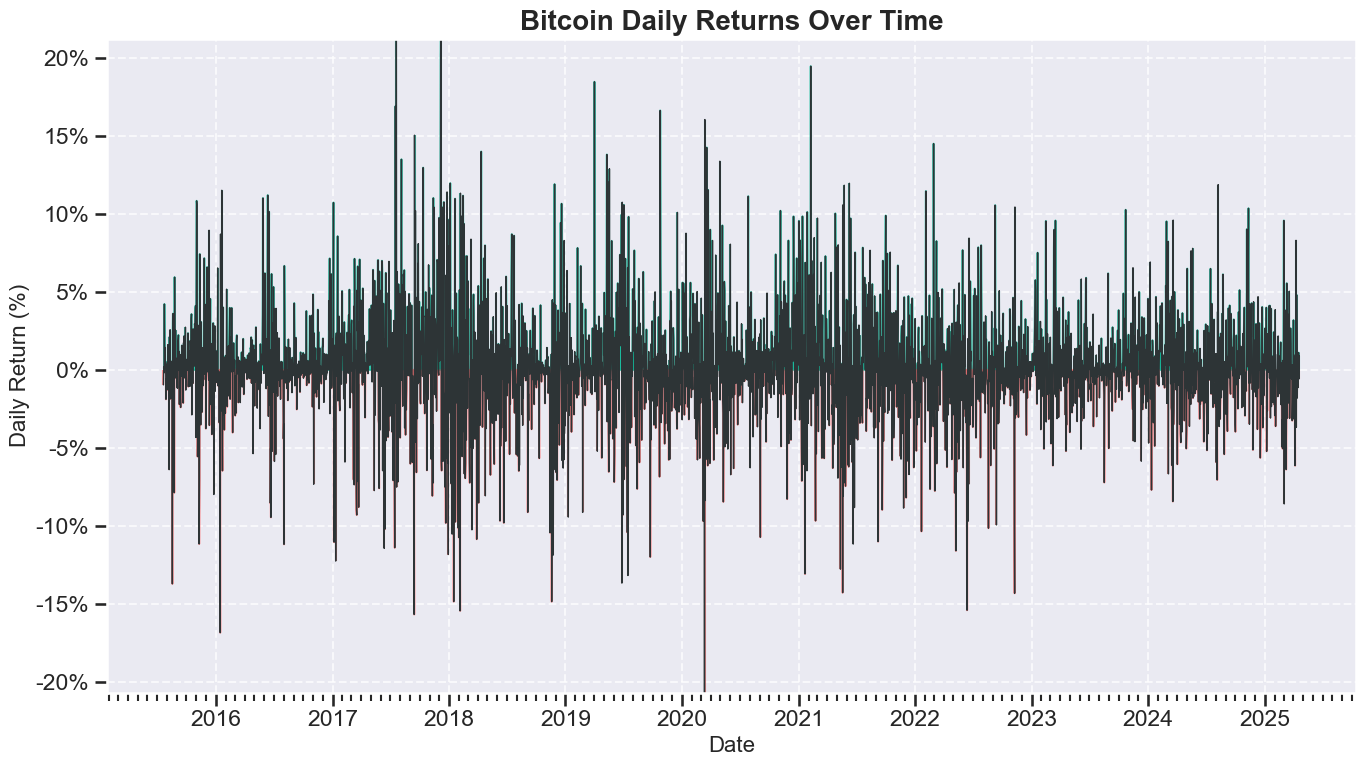

In [10]:
# Calculate daily returns
daily_returns = df['Close'].pct_change() * 100

# Create a new figure for returns
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the returns
ax.fill_between(df.index, daily_returns, 0, where=daily_returns >= 0, color='#00b894', alpha=0.7)
ax.fill_between(df.index, daily_returns, 0, where=daily_returns < 0, color='#ff6b6b', alpha=0.7)
ax.plot(df.index, daily_returns, color='#2d3436', linewidth=1)

# Format the x-axis to show dates nicely
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add labels and title
ax.set_title('Bitcoin Daily Returns Over Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Daily Return (%)', fontsize=16)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:.0f}%"))

# Find and annotate the maximum and minimum returns
max_return_idx = daily_returns.idxmax()
max_return = daily_returns.loc[max_return_idx]
min_return_idx = daily_returns.idxmin()
min_return = daily_returns.loc[min_return_idx]

ax.annotate(f'Max daily return: +{max_return:.1f}%',
            xy=(max_return_idx, max_return),
            xytext=(max_return_idx, max_return*0.8),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12)

ax.annotate(f'Min daily return: {min_return:.1f}%',
            xy=(min_return_idx, min_return),
            xytext=(min_return_idx, min_return*0.8),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12)

# Set y-axis limits to make the returns more visible while keeping outliers
y_range = np.percentile(daily_returns.dropna(), [1, 99])
y_padding = (y_range[1] - y_range[0]) * 0.5
ax.set_ylim(y_range[0] - y_padding, y_range[1] + y_padding)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
path = '/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/FVG_Grid_Search/btc_train_results_'

results = {}
for i in range(len(years)-1):
    res = pd.read_csv(f'{path}{years[i]}-{years[i+1]}.csv')
    res.sort_values(by='Strategy Sharpe Ratio', inplace=True, ascending=False)
    results[years[i]] = [res.iloc[0, :4].to_list()] 

results = pd.DataFrame(results, index = ['Optimal Parameters']).T
results['Paramters from test set'] = results['Optimal Parameters'].shift(1)
results.dropna(inplace=True)
results.to_latex()

'\\begin{tabular}{lll}\n\\toprule\n & Optimal Parameters & Paramters from test set \\\\\n\\midrule\n2017 & [50.0, 1.5, 30.0, 10.0] & [50.0, 1.5, 30.0, 10.0] \\\\\n2018 & [30.0, 1.5, 45.0, 10.0] & [50.0, 1.5, 30.0, 10.0] \\\\\n2019 & [30.0, 1.5, 45.0, 10.0] & [30.0, 1.5, 45.0, 10.0] \\\\\n2020 & [10.0, 1.0, 30.0, 5.0] & [30.0, 1.5, 45.0, 10.0] \\\\\n2021 & [10.0, 1.5, 60.0, 10.0] & [10.0, 1.0, 30.0, 5.0] \\\\\n2022 & [30.0, 1.0, 30.0, 10.0] & [10.0, 1.5, 60.0, 10.0] \\\\\n2023 & [30.0, 2.0, 60.0, 5.0] & [30.0, 1.0, 30.0, 10.0] \\\\\n2024 & [50.0, 1.5, 45.0, 10.0] & [30.0, 2.0, 60.0, 5.0] \\\\\n\\bottomrule\n\\end{tabular}\n'